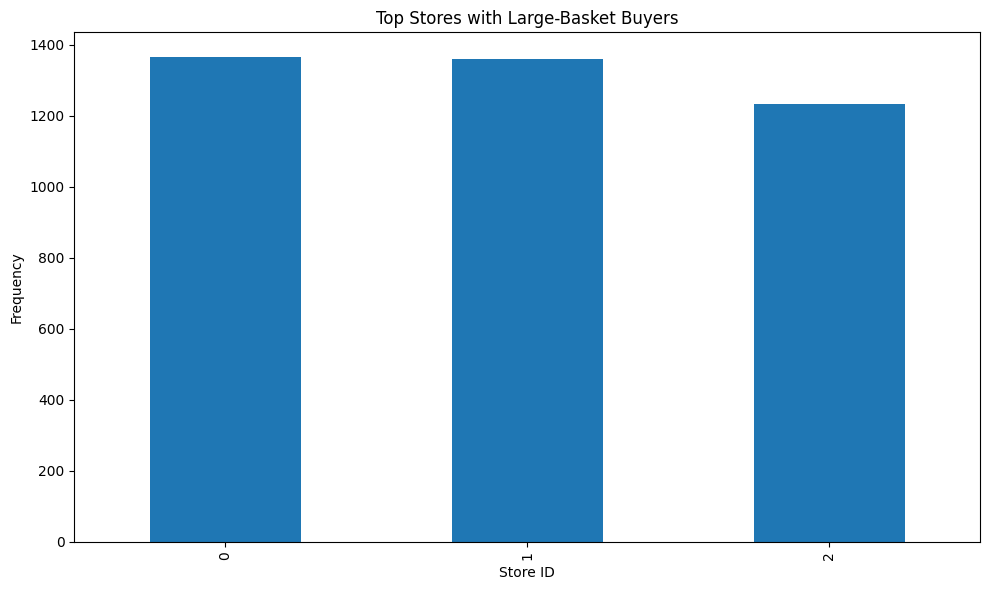

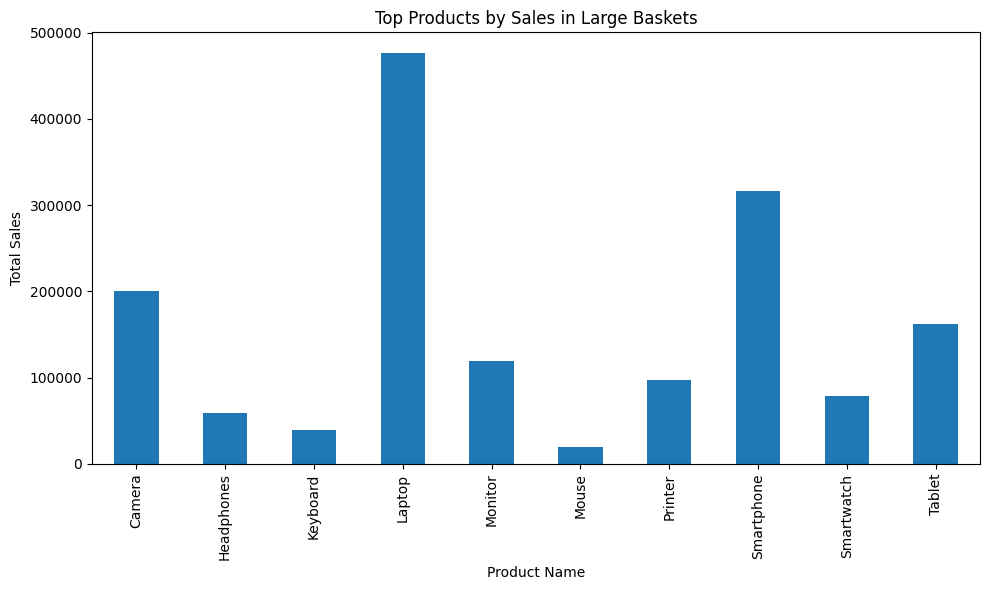

Most Prevalent Products:
 Product Name
Laptop        559
Smartwatch    556
Camera        555
Headphones    543
Tablet        541
Smartphone    539
Mouse         539
Monitor       535
Printer       532
Keyboard      531
Name: count, dtype: int64

Frequency of Large Baskets: 497

Top Stores with Large Baskets:
 StoreID
0    1366
1    1358
2    1232
Name: count, dtype: int64

Top Products in Large Baskets:
 Product Name
Tablet        405
Camera        401
Monitor       399
Laptop        397
Smartphone    396
Smartwatch    395
Headphones    395
Mouse         393
Keyboard      388
Printer       387
Name: count, dtype: int64

Top Products by Total Sales in Large Baskets:
 Product Name
Camera        200500
Headphones     59250
Keyboard       38800
Laptop        476400
Monitor       119700
Mouse          19650
Printer        96750
Smartphone    316800
Smartwatch     79000
Tablet        162000
Name: Price, dtype: int64


In [7]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt

# Load the sales data
file_path = '/content/sales_data (1).csv'  # Replace this path with the uploaded file path in Colab
sales_data = pd.read_csv(file_path)

# Analyze the most prevalent products in customer baskets
most_prevalent_products = sales_data['Product Name'].value_counts().head(10)

# Frequency of large baskets (more than 5 products per order)
basket_sizes = sales_data.groupby('OrderID').size()
large_basket_frequency = basket_sizes[basket_sizes > 5].count()

# Identify stores with large-basket buyers and their counts
large_basket_orders = basket_sizes[basket_sizes > 5].index
stores_with_large_baskets = sales_data[sales_data['OrderID'].isin(large_basket_orders)]['StoreID'].value_counts()

# Visualization for stores with most large-basket buyers
plt.figure(figsize=(10, 6))
stores_with_large_baskets.head(10).plot(kind='bar', title="Top Stores with Large-Basket Buyers", xlabel="Store ID", ylabel="Frequency")
plt.tight_layout()
plt.show()

# Analyze top-N products typical to large-basket customers
large_basket_products = sales_data[sales_data['OrderID'].isin(large_basket_orders)]['Product Name'].value_counts().head(10)

# Analyze demographic categorical makeup of their baskets
# Since the original dataset doesn't have a `Category` column, we'll use 'Product Name' for grouping as a placeholder.
demographic_basket_composition = sales_data[sales_data['OrderID'].isin(large_basket_orders)].groupby('Product Name')['Price'].sum()

# Visualization for categorical makeup of large-basket buyers
plt.figure(figsize=(10, 6))
demographic_basket_composition.head(10).plot(kind='bar', title="Top Products by Sales in Large Baskets", xlabel="Product Name", ylabel="Total Sales")
plt.tight_layout()
plt.show()

# Print summarized results
print("Most Prevalent Products:\n", most_prevalent_products)
print("\nFrequency of Large Baskets:", large_basket_frequency)
print("\nTop Stores with Large Baskets:\n", stores_with_large_baskets.head(10))
print("\nTop Products in Large Baskets:\n", large_basket_products)
print("\nTop Products by Total Sales in Large Baskets:\n", demographic_basket_composition.head(10))